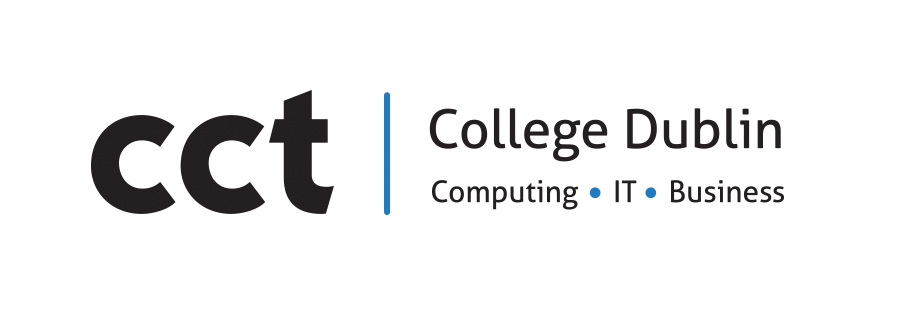

# CA3: Constraint Satisfaction Problem 

###### Author: Lauro Ribeiro, Number: 2016291, Lecturer: David McQuaid, Module: Artificial Intelligence.

I implemented a Constraint Satisfaction Problem Framework to solve two specific cases. It was not easy to build up from scratch as most people use pre-existing Python packages to solve such a problem.
I looked up for tutorials, others' code or any source of information regards to this specific task; unfortunately, I have not found anything for granted.

I started to look for books that might help me, so I came across "Artificial Intelligence: A Modern Approach(AIMA)" written by Stuart J. Russell and Peter Norvig, this book saved me, although I might have done more straightforward but, this was the easiest I could do. 

Therefore, I will explain on my own words how my framework works regards to its implementation on this project.


### I created the Variable class where I pass the variable itself, the domain and the neighbours as parameters when I instantiate an object from this class. The Neighbours work as constraints that define which domain each variable will take to solve the problem. 
class Variable:

    def __init__(self, variable, domain, neighbours):
        self.variable = variable
        self.domain = domain
        self.neighbours = neighbours
        self.color = None


### I also developed the class ConstraintSatisfactionProblem with all the functions to backtrack and check the consistency of our constraints, it uses depth-first search which selects values for one variable at a time and "backtracks" when a variable has no legal values left to assign. 
class ConstraintSatisfactionProblem:

    def backtracking_search(self, csp):
        return self.recursive_backtracking([], csp)

    def recursive_backtracking(self, assignment, csp):
        if self.assignment_complete(assignment, csp):
            return assignment

        unassigned_var = self.get_unassigned_variable(csp, assignment, "DH")

### Loop through colors(or numbers) of the unassigned variable's domain.      
        
        for value in unassigned_var.domain:
            if self.consistent(unassigned_var, value, assignment):
                unassigned_var.color = value
                assignment.append(unassigned_var)
                csp = self.forward_checking(assignment, csp)

                result = self.recursive_backtracking(assignment, csp)
                if result != -1:
                    return result

            if unassigned_var in assignment:
                assignment.remove(unassigned_var)

#### -1 represents failure
        return -1

### This function starts with an empty unassigned values list. If each value in the constraint is not assigned yet, it appends it into the empty unassigned list. 
    def forward_checking(self, assignment, csp):
        unassigned_values = []
        for value in csp:
            if value not in assignment:
                unassigned_values.append(value)

### For each value in the constraint for each unassigned value in the list, if value is in the unasssigned neighbour list, and for each color(number) in the domain, if it is not consistent, remove the assigned color(number) from the value and return the constraint.
        for value in csp:
            for unassigned_value in unassigned_values:
                if value in unassigned_value.neighbours:
                    for color in value.domain:
                        if not self.consistent(value, color, assignment):
                            value.domain.remove(color)


        return csp

### The consistent function has an empty assigned neighbours list. Each region(or variable) in the assignment, appends it in the assigned neighbours' list if they are already not there. And if the value is equal to assigned neighbour colour (number) returns false, otherwise, return true.

    def consistent(self, unassigned_var, value, assignment):
        assigned_neighbours = []

        for assigned_region in assignment:
            if assigned_region.variable in unassigned_var.neighbours:
                assigned_neighbours.append(assigned_region)

        for assigned_neighbour in assigned_neighbours:
            if value == assigned_neighbour.color:
                return False

        return True
### The function is_neighbours compares each variable constraints to check if they match, that returns true.

    def is_neighbours(self, region1, region2):
        for neighbour in region1.neighbours:
            if neighbour == region2.variable:
                return True

### Get Unassigned variable chooses the variable in most constraints if the method is equal to "DH"(Degree Heuristic).  
    def get_unassigned_variable(self, csp, assignment, method):
       
        if method == "DH":
            neighbours_amount = 0
            selected_region = None
### For each variable in the constraint if they are not in the assignment and if their variables' neighbour length bigger than the amount of neighbours, assign the variables' neighbour length to neighbours_amount and variable to selected_region, returns select region(variable) at the end.
            for region in csp:
                if region not in assignment:
                    if len(region.neighbours) > neighbours_amount:
                        neighbours_amount = len(region.neighbours)
                        selected_region = region

            return selected_region
### The assignment complete function checks if the assignment length is the same as the constraint length. If it is yes, returns true, otherwise, return false.
    def assignment_complete(self, assignment, csp):
        if len(assignment) == len(csp):
            return True

        return False

# The Irish Counties 

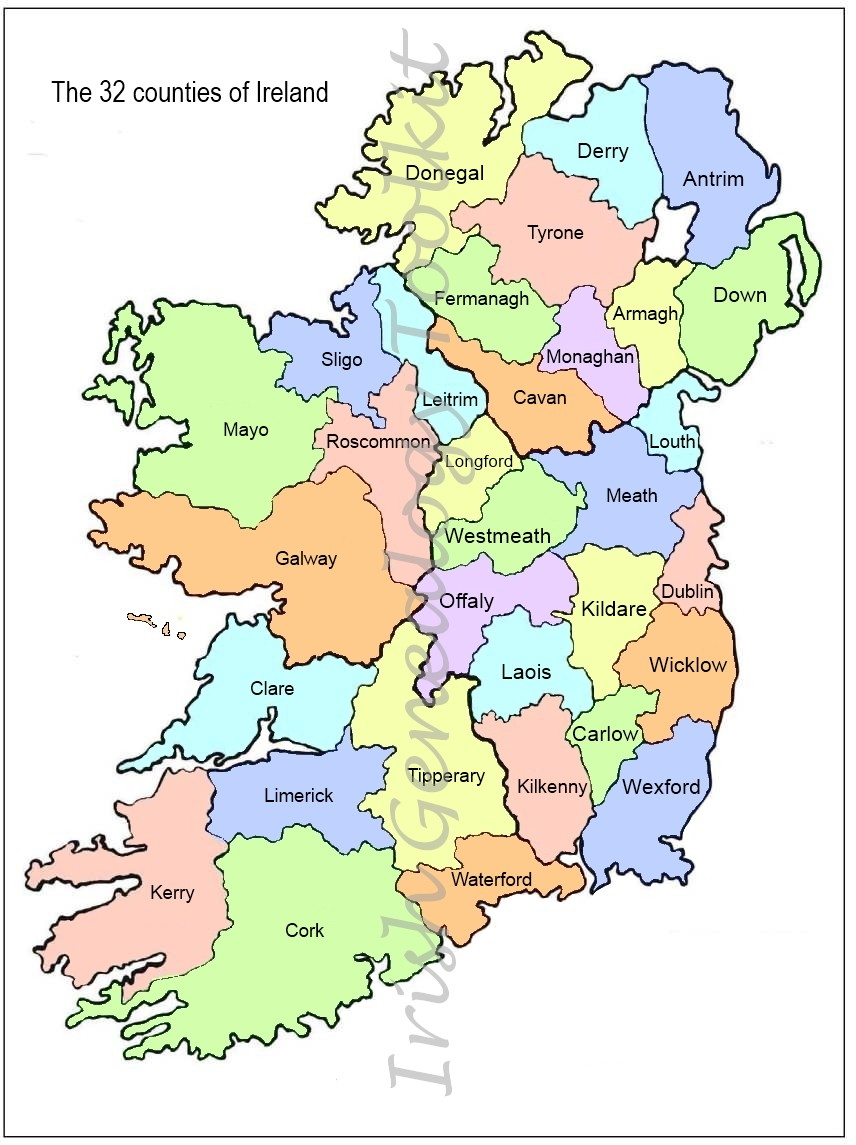

### Task
I defined seven colours to domain variable then; I instantiated 32 Variable objects representing the Irish counties, passing the variable name, domain and constraints.

Finally, I created a CSP object from ConstraintSatisfactionProblem class from this object, I called the backtracking_search() function, where I passed the 32 variables and assigned to the result variable. 

Lastly, I looped through each element in the result variable, which prints the variable name and the actual result.

In [1]:
from LauroRibeiro2016291CA3 import *


if __name__ == "__main__":
    domain = ["blue", "green", "red", "yellow", "purple", "brown", "white"]

    Antrim = Variable("Antrim", domain, ["Down","Derry","Tyrone","Armagh"])
    Armagh = Variable("Armagh", domain, ["Down", "Antrim", "Louth", "Tyrone", "Monaghan"])
    Carlow = Variable("Carlow", domain, ["Wexford", "Wicklow", "Kilkenny","Laois","Kildare"])
    Cavan = Variable("Cavan", domain, ["Meath", "Monaghan","Longford","Leitrim","Louth", "Westmeath","Fermanagh"])
    Clare = Variable("Clare", domain, ["Kerry", "Limerick","Tipperary","Galway"])
    Cork = Variable("Cork", domain, ["Kerry", "Limerick","Tipperary", "Waterford"])
    Derry = Variable("Derry", domain, ["Tyrone", "Antrim","Donegal"])
    Donegal = Variable("Donegal", domain, ["Derry", "Tyrone","Fermanagh", "Leitrim", "Sligo"])
    Down = Variable("Down", domain, ["Antrim", "Armagh", "Louth"])
    Dublin = Variable("Dublin", domain, ["Meath","Kildare","Wicklow"])
    Fermanagh = Variable("Fermanagh", domain, ["Donegal", "Tyrone", "Monaghan","Leitrim", "Cavan"])
    Galway = Variable("Galway", domain, ["Mayo","Roscommon","Offaly","Tipperary", "Clare"])
    Kerry = Variable("Kerry", domain, ["Cork", "Limerick", "Clare"])
    Kildare = Variable("Kildare", domain, ["Dublin", "Wicklow", "Meath", "Offaly", "Laois", "Carlow"])
    Kilkenny = Variable("Kilkenny", domain, ["Wexford", "Carlow", "Laois", "Tipperary", "Waterford"])
    Laois = Variable("Laois", domain, ["Kildare", "Carlow", "Kilkenny","Tipperary", "Offaly"])
    Leitrim = Variable("Leitrim", domain, ["Cavan","Longford","Sligo","Fermanagh", "Donegal", "Roscommon"])
    Limerick = Variable("Limerick", domain, ["Kerry","Cork","Tipperary","Clare"])
    Longford = Variable("Longford", domain, ["Westmeath", "Cavan", "Leitrim","Roscommon", "Meath"])
    Louth = Variable("Louth", domain, ["Meath", "Cavan","Monaghan", "Armagh", "Down"])
    Mayo = Variable("Mayo", domain, ["Galway", "Roscommon", "Sligo"])
    Meath = Variable("Meath", domain, ["Dublin", "Louth", "Kildare","Monaghan","Cavan","Longford", "Westmeath", "Offaly"])
    Monaghan = Variable("Monaghan", domain, ["Louth", "Armagh", "Tyrone","Fermanagh","Cavan", "Meath"])
    Offaly = Variable("Offaly", domain, ["Laois", "Kildare", "Meath","Westmeath","Roscommon","Galway","Tipperary"])
    Roscommon = Variable("Roscommon", domain, ["Mayo","Sligo","Leitrim","Longford","Westmeath","Offaly","Galway"])
    Sligo = Variable("Sligo", domain, ["Mayo","Roscommon","Leitrim","Donegal"])
    Tipperary = Variable("Tipperary", domain, ["Waterford","Kilkenny","Laois","Offaly","Galway","Clare","Limerick","Cork"])
    Tyrone = Variable("Tyrone", domain, ["Derry","Antrim","Armagh","Monaghan","Fermanagh","Donegal"])
    Waterford = Variable("Waterford", domain, ["Wexford","Kilkenny","Tipperary","Cork"])
    Westmeath = Variable("Westmeath", domain, ["Meath", "Offaly", "Longford","Roscommon", "Cavan"])
    Wexford = Variable("Wexford", domain, ["Wicklow","Carlow","Kilkenny","Waterford"])
    Wicklow = Variable("Wicklow", domain, ["Wexford", "Dublin","Carlow","Kildare"])
    

    csp_object = ConstraintSatisfactionProblem()
    result = csp_object.backtracking_search(
        [Antrim,Armagh,Carlow,Cavan,Clare,Cork,Derry,Donegal,Down,Dublin,Fermanagh,Galway,Kerry,Kildare,Kilkenny,Laois,Leitrim, Limerick,Longford,Louth,Mayo,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Tyrone,Waterford,Westmeath,Wexford,Wicklow])

    for region in result:
        print([region.variable, region.color])

['Meath', 'blue']
['Tipperary', 'blue']
['Cavan', 'green']
['Offaly', 'green']
['Roscommon', 'blue']
['Kildare', 'red']
['Leitrim', 'red']
['Monaghan', 'red']
['Tyrone', 'blue']
['Armagh', 'green']
['Carlow', 'blue']
['Donegal', 'green']
['Fermanagh', 'yellow']
['Galway', 'red']
['Kilkenny', 'green']
['Laois', 'yellow']
['Longford', 'yellow']
['Louth', 'yellow']
['Westmeath', 'red']
['Antrim', 'red']
['Clare', 'green']
['Cork', 'green']
['Limerick', 'red']
['Sligo', 'yellow']
['Waterford', 'red']
['Wexford', 'yellow']
['Wicklow', 'green']
['Derry', 'yellow']
['Down', 'blue']
['Dublin', 'yellow']
['Kerry', 'blue']
['Mayo', 'green']


# The 8x8 Sudoku Problem

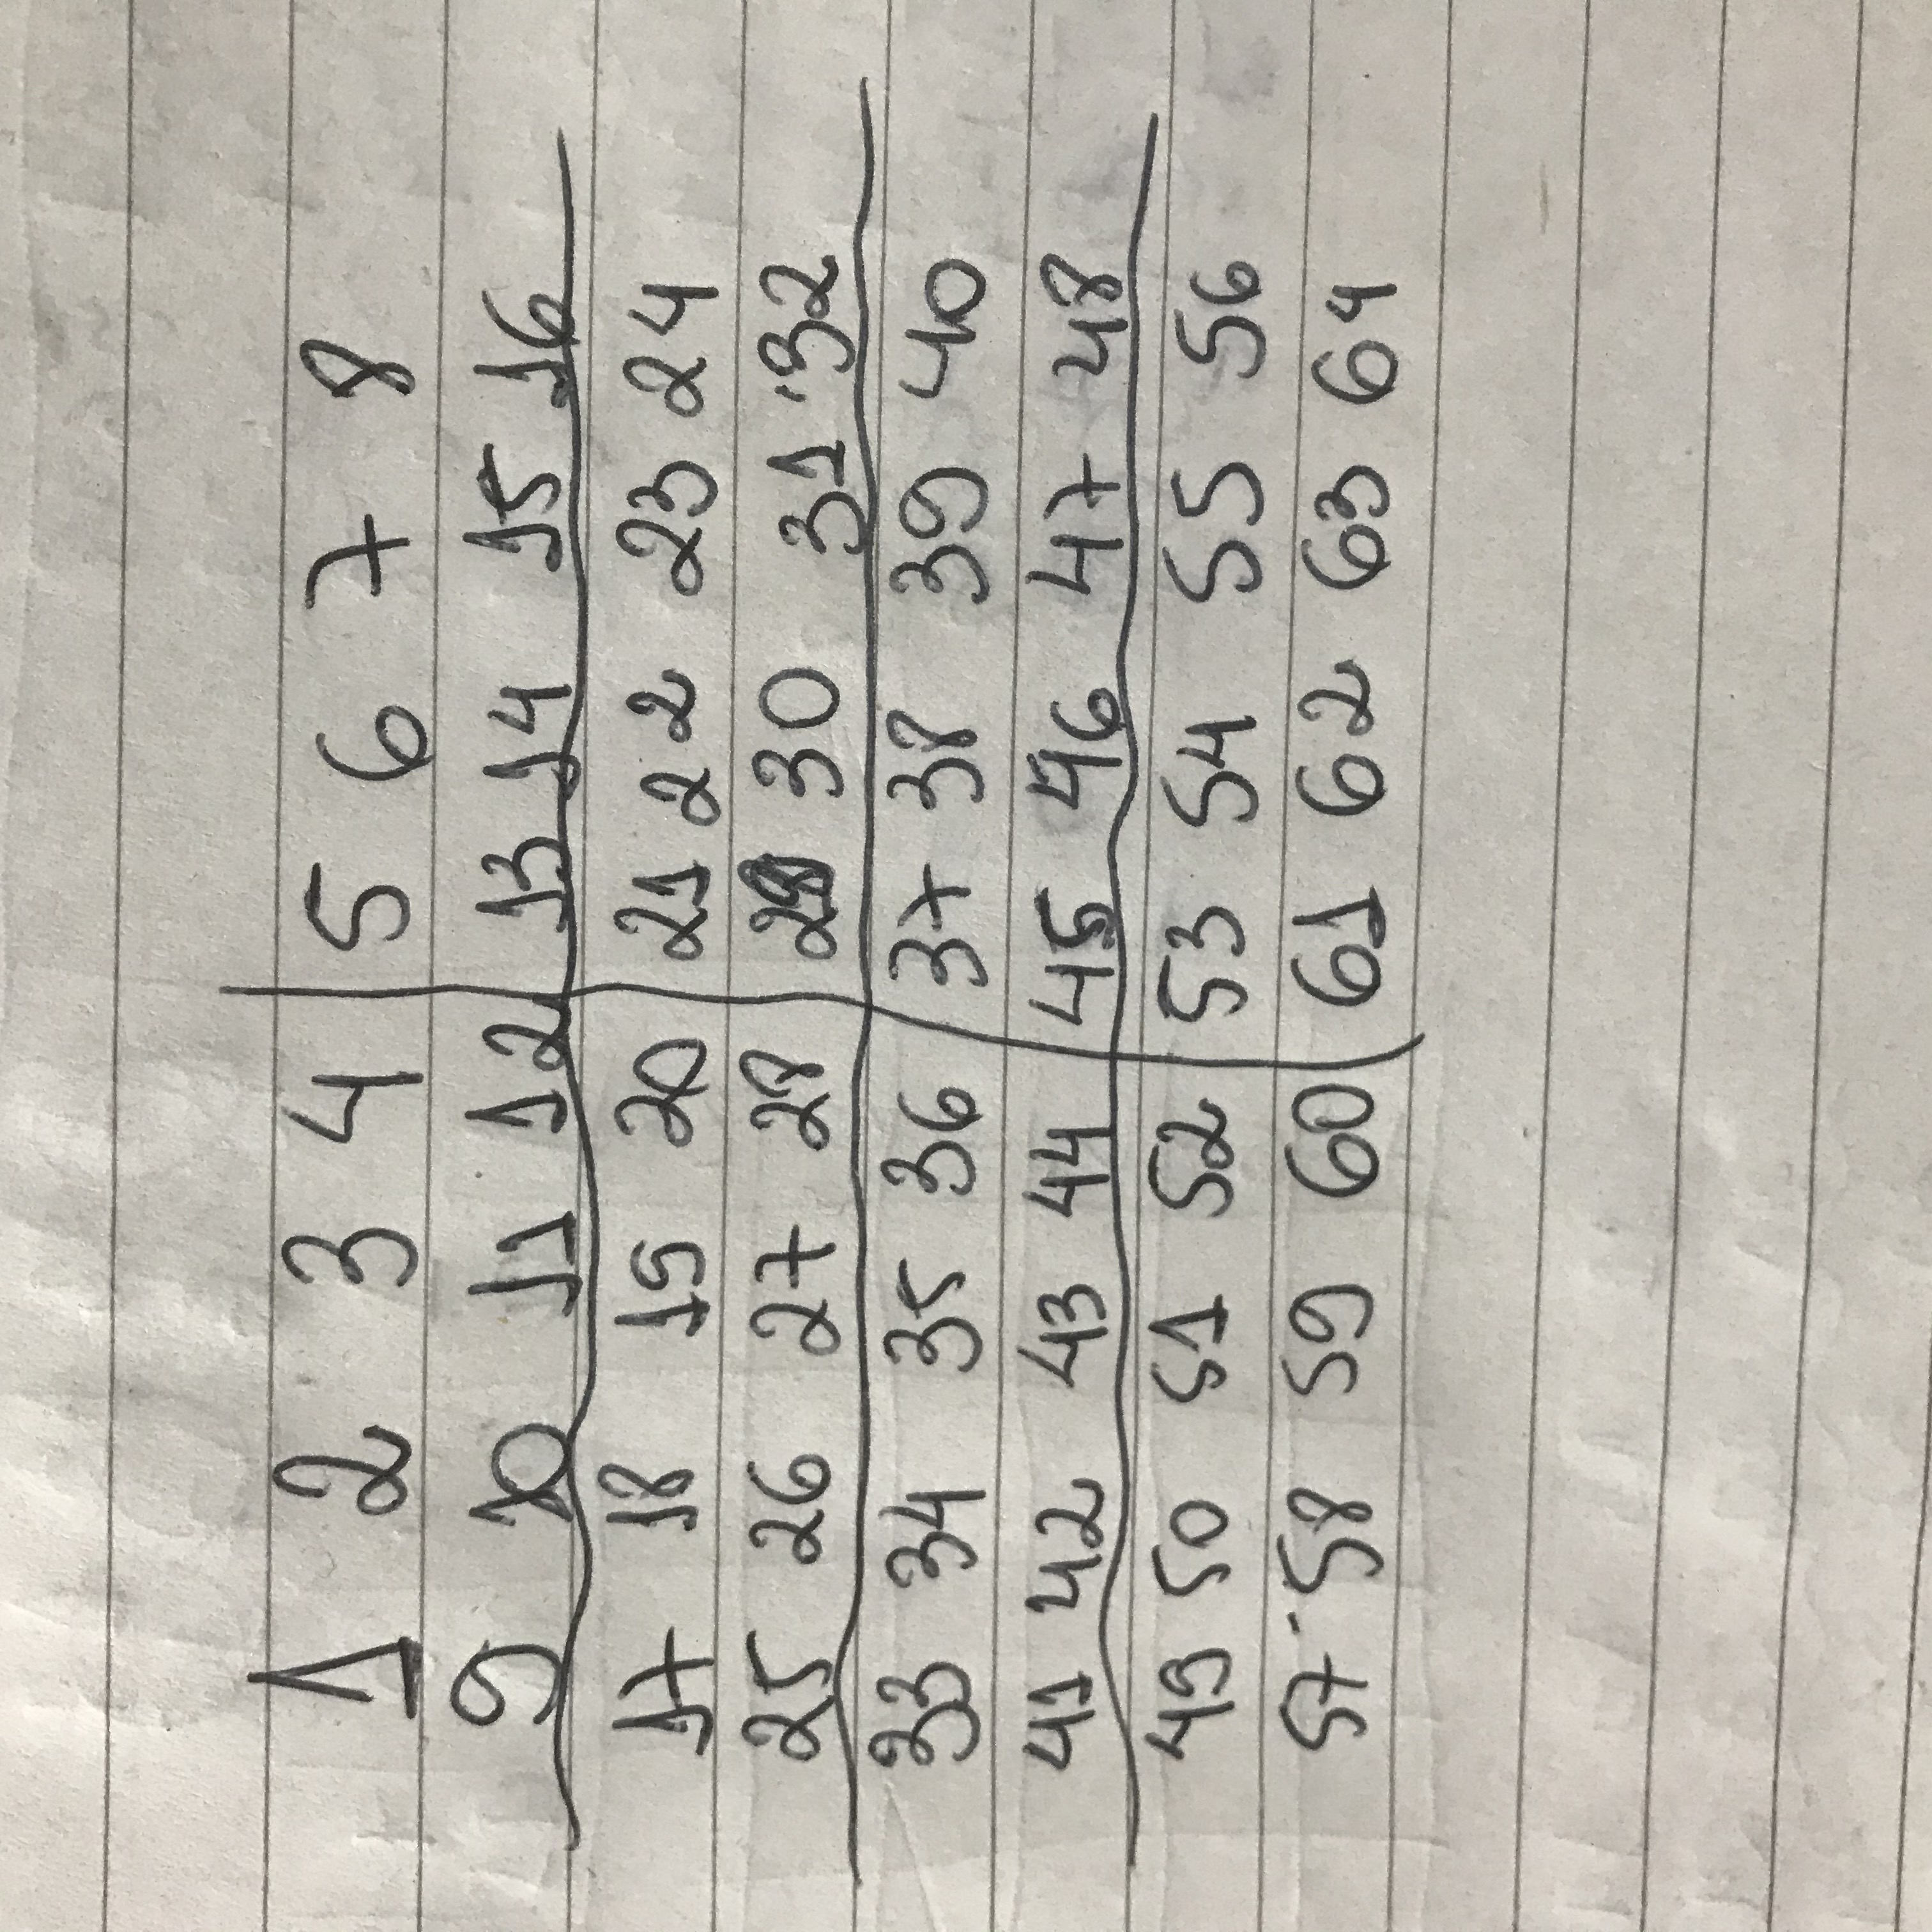

It was the toughest one in the entire module to implement; I spent days planning on paper on how to solve this problem, as you can see the image above. 

I assigned numbers from 1 to 8 to the domain; it represents the eight possibilities to my Sudoku. 

I instantiated 64 variables representing all places in an 8x8 Sudoku.
I split these numbers into eight squares, for each number I passed the whole row and column where it is in and the other values from the square it belongs. 

I instantiated an object from the ConstraintSatisfactionProblem class. I called the backtracking_search function with all 64 variables into it and the function onto this object and assigned it to the variable result. 

Finally, I looped through all result values and for each one of them, prints the variable name and its solution.

In [2]:
from LauroRibeiro2016291CA3 import *

if __name__ == "__main__":
    domain = [1,2,3,4,5,6,7,8]

    one = Variable(1, domain, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 25, 33, 41, 49, 57])
    two = Variable(2, domain, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 26, 34, 42, 50, 58])
    three = Variable(3, domain, [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 19, 27, 35, 43, 51, 59])
    four = Variable(4, domain, [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 20, 28, 36, 44, 52, 60])
    five = Variable(5, domain, [1, 2, 3, 4, 6, 7, 8, 13, 14, 15, 16, 21, 29, 37, 45, 53, 61])
    six = Variable(6, domain, [1, 2, 3, 4, 5, 7, 8, 13, 14, 15, 16, 22, 30, 38, 46, 54, 62])
    seven = Variable(7, domain, [1, 2, 3, 4, 5, 6, 8, 13, 14, 15, 16, 23, 31, 39, 47, 55, 63])
    eigth = Variable(8, domain, [1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 24, 32, 40, 48, 56, 64])
    nine = Variable(9, domain, [10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 17, 25, 33, 41, 49, 57])
    ten = Variable(10, domain, [9, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 18, 26, 34, 42, 50, 58])
    eleven = Variable(11, domain, [9, 10, 12, 13, 14, 15, 16, 1, 2, 3, 4, 19, 27, 35, 43, 51, 59])
    twelve = Variable(12, domain, [9, 10, 11, 13, 14, 15, 16, 1, 2, 3, 4, 20, 28, 36, 44, 52, 60])
    thirteen = Variable(13, domain, [9, 10, 11, 12, 14, 15, 16, 5, 6, 7, 8, 21, 29, 37, 45, 53, 61])
    fourteen = Variable(14, domain, [9, 10, 11, 12, 13, 15, 16, 5, 6, 7, 8, 22, 30, 38, 46, 54, 62])
    fifteen = Variable(15, domain, [9, 10, 11, 12, 13, 14, 16, 5, 6, 7, 8, 23, 31, 39, 47, 55, 63])
    sixteen = Variable(16, domain, [9, 10, 11, 12, 13, 14, 15, 5, 6, 7, 8, 24, 32, 40, 48, 56, 64])
    seventeen = Variable(17, domain, [18, 19, 20, 21, 22, 23, 24, 1, 9, 25, 26, 27, 28, 33, 41, 49, 57])
    eighteen = Variable(18, domain, [17, 19, 20, 21, 22, 23, 24, 10, 2, 25, 26, 27, 28, 34, 42, 50, 58])
    nineteen = Variable(19, domain, [17, 18, 20, 21, 22, 23, 24, 11, 3, 25, 26, 27, 28, 35, 43, 51, 59])
    twenty = Variable(20, domain, [17, 18, 19, 21, 22, 23, 24, 12, 4, 25, 26, 27, 28, 36, 44, 52, 60])
    twentyone = Variable(21, domain, [17, 18, 19, 20, 22, 23, 24, 13, 5, 29, 30, 31, 32, 37, 45, 53, 61])
    twentytwo = Variable(22, domain, [17, 18, 19, 20, 21, 23, 24, 6, 14, 29, 30, 31, 32,38, 46, 54, 62])
    twentythree = Variable(23, domain, [17, 18, 19, 20, 21, 22, 24, 7, 15, 29, 30, 31, 32, 39, 47, 55, 63])
    twentyfour = Variable(24, domain, [17, 18, 19, 20, 21, 22, 23, 16, 8, 29, 30, 31, 32, 40, 48, 56, 64])
    twentyfive = Variable(25, domain, [26, 27, 28, 29, 30, 31, 32, 17, 9, 1, 18, 19, 20, 33, 41, 49, 57])
    twentysix = Variable(26, domain, [25, 27, 28, 29, 30, 31, 32, 18, 10, 2, 17, 19, 20, 34, 42, 50, 58])
    twentyseven = Variable(27, domain, [25, 26, 28, 29, 30, 31, 32, 19, 11, 3, 17, 18, 20, 35, 43, 51, 59])
    twentyeight = Variable(28, domain, [25, 26, 27, 29, 30, 31, 32, 20, 12, 4, 17, 18, 19, 36, 44, 52, 60])
    twentynine = Variable(29, domain, [25, 26, 27, 28, 30, 31, 32,21, 13, 5, 22, 23, 24, 37, 45, 53, 61])
    thirty = Variable(30, domain, [25, 26, 27, 28, 29, 31, 32, 22, 14, 6, 21, 23, 24, 38, 46, 54, 62])
    thirtyone = Variable(31, domain, [25, 26, 27, 28, 29, 30, 32, 23, 15, 7, 21, 22, 24, 39, 47, 55, 63])
    thirtytwo = Variable(32, domain, [25, 26, 27, 28, 29, 30, 31, 24, 16, 8, 21, 22, 23, 40, 48, 56, 64])
    thirtythree = Variable(33, domain, [34, 35, 36, 37, 38, 38, 40, 25, 17, 9, 1, 41, 42, 43, 44, 49, 57])
    thirtyfour = Variable(34, domain, [33, 35, 36, 37, 38, 39, 40, 26, 18, 10, 2, 41, 42, 43, 44, 50, 58])
    thirtyfive = Variable(35, domain, [33, 34, 36, 37, 38, 39, 40, 27, 19, 11, 3, 41, 42, 43, 44, 51, 59])
    thirtysix = Variable(36, domain, [33, 34, 35, 37, 38, 39, 40, 28, 20, 12, 4, 41, 42, 43, 44, 52, 60])
    thirtyseven = Variable(37, domain, [33, 34, 35, 36, 38, 39, 40, 29, 21, 13, 5, 45, 46, 47, 48, 53, 61])
    thirtyeight = Variable(38, domain, [33, 34, 35, 36, 37, 39, 40, 30, 22, 14, 6, 45, 46, 47, 48, 54, 62])
    thirtynine = Variable(39, domain, [33, 34, 35, 36, 37, 38, 40, 31, 23, 15, 7, 45, 46, 47, 48, 55, 63])
    forty = Variable(40, domain, [33, 34, 35, 36, 37, 38, 39, 32, 24, 16, 8, 45, 46, 47, 48, 56, 64])
    fortyone = Variable(41, domain, [42, 43, 44, 45, 46, 47, 48, 33, 25, 17, 9, 1, 34, 35, 36, 49, 57])
    fortytwo = Variable(42, domain, [41, 43, 44, 45, 46, 47, 48, 34, 26, 18, 10, 2, 33, 35, 36, 50, 58])
    fortythree = Variable(43, domain, [41, 42, 44, 45, 46, 47, 48, 35, 27, 19, 11, 3, 33, 34, 36, 51, 59])
    fortyfour = Variable(44, domain, [41, 42, 43, 45, 46, 47, 48, 36, 28, 20, 12, 4, 33, 34, 35, 52, 60])
    fortyfive = Variable(45, domain, [41, 42, 43, 45, 46, 47, 48, 37, 29, 21, 13, 5, 38, 39, 40, 53, 61])
    fortysix = Variable(46, domain, [41, 42, 43, 44, 45, 47, 48, 38, 30, 22, 14, 6, 37, 39, 40, 54, 62])
    fortyseven = Variable(47, domain, [41, 42, 43, 44, 45, 46, 48, 39, 31, 23, 15, 7, 37, 38, 40, 55, 63])
    fortyeight = Variable(48, domain, [41, 42, 43, 44, 45, 46, 47, 40, 32, 24, 16, 8, 37, 38, 39, 56, 64])
    fortynine = Variable(49, domain, [50, 51, 52, 53, 54, 55, 56, 41, 33, 25, 17, 9, 1, 57, 58, 59, 60])
    fifty = Variable(50, domain, [49, 51, 52, 53, 54, 55, 56, 42, 34, 26, 18, 10, 2, 57, 58, 59, 60])
    fiftyone = Variable(51, domain, [49, 50, 52, 53, 54, 55, 56, 43, 35, 27, 19, 11, 3, 57, 58, 59, 60])
    fiftytwo = Variable(52, domain, [49, 50, 51, 53, 54, 55, 56, 44, 36, 28, 20, 12, 4, 57, 58, 59, 60])
    fiftythree = Variable(53, domain, [49, 50, 51, 52, 54, 55, 56, 45, 37, 29, 21, 13, 5, 61, 62, 63, 64])
    fiftyfour = Variable(54, domain, [49, 50, 51, 52, 53, 55, 56, 46, 38, 30, 22, 14, 6, 61, 62, 63, 64])
    fiftyfive = Variable(55, domain, [49, 50, 51, 52, 53, 54, 56, 47, 39, 31, 23, 15, 7, 61, 62, 63, 64])
    fiftysix = Variable(56, domain, [49, 50, 51, 52, 53, 54, 55, 48, 40, 32, 24, 16, 8, 61, 62, 63, 64])
    fiftyseven = Variable(57, domain, [58, 59, 60, 61, 62, 63, 64, 49, 41, 33, 25, 17, 9, 1, 50, 51, 52])
    fiftyeight = Variable(58, domain, [57, 59, 60, 61, 62, 63, 64, 50, 42, 34, 26, 18, 10, 2, 49, 51, 52])
    fiftynine = Variable(59, domain, [57, 58, 60, 61, 62, 63, 64, 51, 43, 35, 27, 19, 11, 3, 49, 50, 52])
    sixty = Variable(60, domain, [57, 58, 59, 61, 62, 63, 64, 52, 44, 36, 28, 20, 12, 4, 49, 50, 51])
    sixtyone = Variable(61, domain, [57, 58, 59, 60, 62, 63, 64, 53, 45, 37, 29, 21, 13, 5, 54, 55, 56])
    sixtytwo = Variable(62, domain, [57, 58, 59, 60, 61, 63, 64, 54, 46, 38, 30, 22, 14, 6, 53, 55, 56])
    sixtythree = Variable(63, domain, [57, 58, 59, 60, 61, 62, 64, 55, 47, 39, 31, 23, 15, 7, 53, 54, 56])
    sixtyfour = Variable(64, domain,  [57, 58, 59, 60, 61, 62, 63, 56, 48, 40, 32, 24, 16, 8, 53, 54, 55])
    
    csp_object = ConstraintSatisfactionProblem()
    result = csp_object.backtracking_search(
        [one, two, three, four, five, six, seven, eigth, nine, ten,
         eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty,
         twentyone, twentytwo, twentythree, twentyfour,twentyfive, twentysix, twentyseven, twentyeight, twentynine, thirty,
        thirtyone, thirtytwo, thirtythree, thirtyfour, thirtyfive, thirtysix, thirtyseven, thirtyeight, thirtynine, forty,
        fortyone, fortytwo, fortythree, fortyfour, fortyfive, fortysix, fortyseven, fortyeight, fortynine, fifty,
        fiftyone, fiftytwo, fiftythree, fiftyfour, fiftyfive, fiftysix, fiftyseven, fiftyeight, fiftynine, sixty,
        sixtyone, sixtytwo, sixtythree, sixtyfour])

    for number in result:
        print([number.variable, number.color])

[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 6]
[7, 7]
[8, 8]
[9, 5]
[10, 6]
[11, 7]
[12, 8]
[13, 1]
[14, 2]
[15, 3]
[16, 4]
[17, 2]
[18, 1]
[19, 4]
[20, 3]
[21, 6]
[22, 5]
[23, 8]
[24, 7]
[25, 6]
[26, 5]
[27, 8]
[28, 7]
[29, 2]
[30, 1]
[31, 4]
[32, 3]
[33, 3]
[34, 4]
[35, 1]
[36, 2]
[37, 7]
[38, 8]
[39, 5]
[40, 6]
[41, 7]
[42, 8]
[43, 5]
[44, 6]
[45, 3]
[46, 4]
[47, 1]
[48, 2]
[49, 4]
[50, 3]
[51, 2]
[52, 1]
[53, 8]
[54, 7]
[55, 6]
[56, 5]
[57, 8]
[58, 7]
[59, 6]
[60, 5]
[61, 4]
[62, 3]
[63, 2]
[64, 1]


# References:

Peter Norving, Stuart Russell (2009) Artificial Intelligence: A Modern Approach , 3rd edn., : Pearson.

Fabian Stern (2020) Program like it`s 1970, Available at: https://towardsdatascience.com/program-like-its-1970-6708df2ed101 (Accessed: 29th December 2020).